In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
# Load the Palmer Penguins dataset
penguins = sns.load_dataset('penguins').dropna()

<div class="alert alert-info">Generally it's a bad idea to just drop rows of data with missing values. However, the focus of this activity is to evaluate the performance of manually created features and not data cleaning. So, we will by-pass cleaning up the missing values this one time.</div>

In [14]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [16]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


<div class="alert alert-success">At this point, we should define a analytical question to guide your investigation.</div>

Analytical Question: Identiy the gender of the penguins based on their physical characteristics.

### Manual Features
Now, it's time to define the features that you plan to generate manually.</br>

BFR - the ratio between the body mass of the penguin and the length of their flipper.

<div class="alert alert-success">Remember to explain why this feature supports your analysis.</div>


In [23]:
df = penguins.copy()

In [25]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [27]:
df.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [29]:
df.island.value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [31]:
# Convert categorical variables to numerical
df = pd.get_dummies(penguins, columns=['species', 'island'], drop_first=False)

In [186]:
manual.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,Male,True,False,False,False,False,True
1,39.5,17.4,186.0,3800.0,Female,True,False,False,False,False,True
2,40.3,18.0,195.0,3250.0,Female,True,False,False,False,False,True
4,36.7,19.3,193.0,3450.0,Female,True,False,False,False,False,True
5,39.3,20.6,190.0,3650.0,Male,True,False,False,False,False,True
6,38.9,17.8,181.0,3625.0,Female,True,False,False,False,False,True
7,39.2,19.6,195.0,4675.0,Male,True,False,False,False,False,True
12,41.1,17.6,182.0,3200.0,Female,True,False,False,False,False,True
13,38.6,21.2,191.0,3800.0,Male,True,False,False,False,False,True
14,34.6,21.1,198.0,4400.0,Male,True,False,False,False,False,True


### Create the new manual features

In [33]:
# Manual Feature Engineering
df['BMI'] = df['body_mass_g'] / (df['flipper_length_mm'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
 5   species_Adelie     333 non-null    bool   
 6   species_Chinstrap  333 non-null    bool   
 7   species_Gentoo     333 non-null    bool   
 8   island_Biscoe      333 non-null    bool   
 9   island_Dream       333 non-null    bool   
 10  island_Torgersen   333 non-null    bool   
 11  BMI                333 non-null    float64
dtypes: bool(6), float64(5), object(1)
memory usage: 20.2+ KB


In [37]:
# Splitting the dataset
X = df.drop(columns=['sex'])  # Dropping one-hot target columns
y = df['sex']  # Binary classification for example purposes

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Train a model and analyze feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

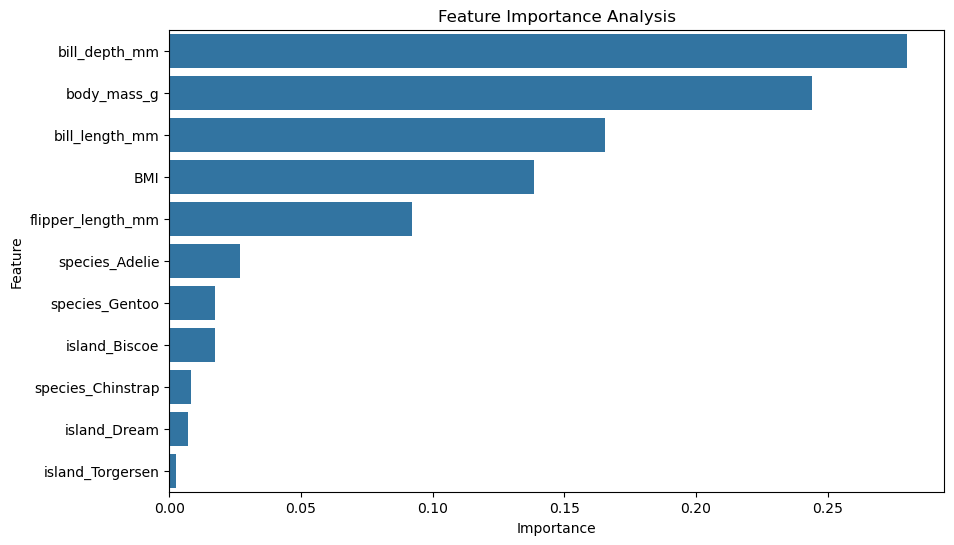

In [43]:
# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance Analysis")
plt.show()

<div class="alert alert-success"> </div><b>Analysis:</b><br> How did your new features do? <br> Are there other ways to evaluate the impact of your new features? <br>Do you need to do anything to guard against overfitting from redundant information?</div>